## 텐서플로우 회귀분석 모델
* 다양한 방법이 존재
* 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 두 가지를 모두 사용한 방법 등등

### 선형회귀 (Linear Regression)

In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [41]:
learning_rate = 0.01
training_steps = 1000

In [42]:
X = np.random.randn(50)
Y = 2 * X + np.random.randn(50)

In [43]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
  return W + x + b

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [44]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
  
  gradients = tape.gradient(loss, [W, b])
  
  optimizer.apply_gradients(zip(gradients, [W, b])) #optimizer가 가져온 gradient의 weight값을 업데이트 하는 역할을 해줌

In [45]:
for step in range(1, training_steps + 1):
  run_optimization()
  
  if step % 50 == 0:
    pred = linear_regression(X)
    loss =mean_square(pred, Y)
    print("step: {:4d}\tloss: {:.4f}\tw: {:.4f}\tb: {:.4f}".format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 3.1403	w: 0.1978	b: -0.5891
step:  100	loss: 3.1334	w: 0.2345	b: -0.5524
step:  150	loss: 3.1332	w: 0.2392	b: -0.5477
step:  200	loss: 3.1332	w: 0.2399	b: -0.5470
step:  250	loss: 3.1332	w: 0.2399	b: -0.5470
step:  300	loss: 3.1332	w: 0.2400	b: -0.5470
step:  350	loss: 3.1332	w: 0.2400	b: -0.5469
step:  400	loss: 3.1332	w: 0.2400	b: -0.5469
step:  450	loss: 3.1332	w: 0.2400	b: -0.5469
step:  500	loss: 3.1332	w: 0.2400	b: -0.5469
step:  550	loss: 3.1332	w: 0.2400	b: -0.5469
step:  600	loss: 3.1332	w: 0.2400	b: -0.5469
step:  650	loss: 3.1332	w: 0.2400	b: -0.5469
step:  700	loss: 3.1332	w: 0.2400	b: -0.5469
step:  750	loss: 3.1332	w: 0.2400	b: -0.5469
step:  800	loss: 3.1332	w: 0.2400	b: -0.5469
step:  850	loss: 3.1332	w: 0.2400	b: -0.5469
step:  900	loss: 3.1332	w: 0.2400	b: -0.5469
step:  950	loss: 3.1332	w: 0.2400	b: -0.5469
step: 1000	loss: 3.1332	w: 0.2400	b: -0.5469


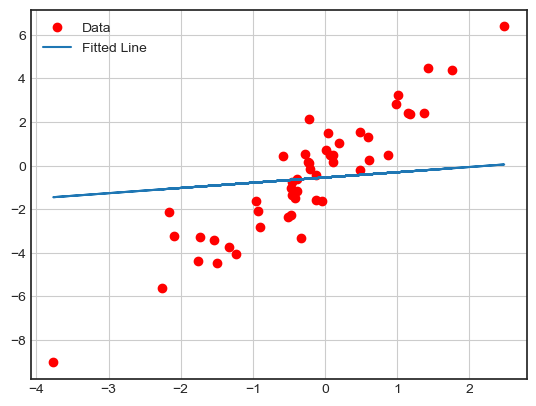

In [46]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W * X + b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항회귀 (Nonlinear Regression)

#### modules import

In [47]:
from tensorflow.keras.optimizers import Adam

#### Hyper Parameters

In [48]:
epochs = 1000
learning_rate = 0.04

In [49]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [50]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-0.7351355
-1.1755797
-2.5760772


### 데이터 지정

In [51]:
X = np.random.randn(50)
Y = X ** 2 + X * np.random.randn(50)

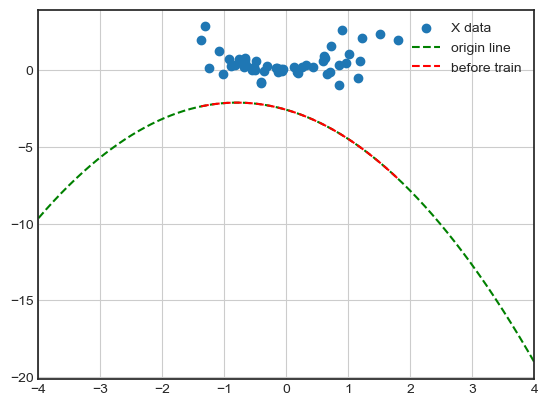

In [52]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a * line_x ** 2 + b * line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label= 'before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

## Util Functions

In [53]:
def compute_loss():
  pred_y = a * (np.array(X) **2) + b*np.array(X) + c
  loss =tf.reduce_mean((Y - pred_y) **2)
  return loss

## Optimizer

In [54]:
optimizer = Adam(learning_rate = learning_rate)

## 학습

In [55]:
for epoch in range(1, epochs + 1, 1):
  optimizer.minimize(compute_loss, var_list=[a, b, c])
  
  if epoch % 100 == 0:
    print("epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a: 1.1751	b: -0.0911	c: -0.3342
epoch:  200	a: 0.9202	b: -0.0269	c: -0.1152
epoch:  300	a: 0.8183	b: -0.0052	c: -0.0235
epoch:  400	a: 0.7925	b: 0.0003	c: -0.0003
epoch:  500	a: 0.7882	b: 0.0012	c: 0.0035
epoch:  600	a: 0.7878	b: 0.0013	c: 0.0040
epoch:  700	a: 0.7877	b: 0.0013	c: 0.0040
epoch:  800	a: 0.7877	b: 0.0013	c: 0.0040
epoch:  900	a: 0.7877	b: 0.0013	c: 0.0040
epoch: 1000	a: 0.7877	b: 0.0013	c: 0.0040


## 학습 후의 회귀선

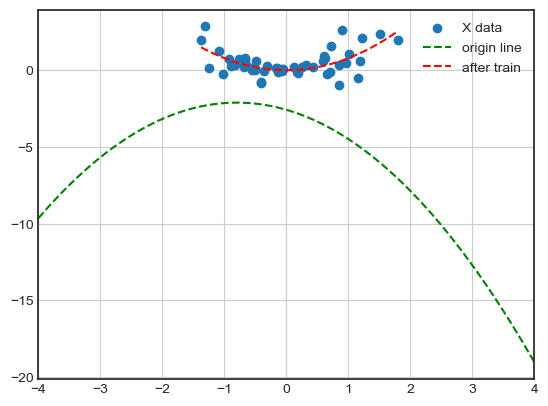

In [56]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a * line_x ** 2 + b * line_x + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label= 'after train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀 (Logistic Regression)
* 다항분류, MNIST

### modules import

In [57]:
from tensorflow.keras.datasets import mnist

### hyper parameter

In [58]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [59]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features]) # 2D지만 1차원 배열로

x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 1s 0us/step


### tf.data API 사용

In [61]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [62]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

### Util Function

In [65]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropyi(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth=num_classes)
  pred_y = tf.clip_by_value(pred_y, le-9, 1.)
  
  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int54))